# **Loan Prediction System**

In [1]:
import numpy as np 
import pandas as pd  
import seaborn as sns 
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
data = pd.read_csv("dataset/data.csv") 
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
categorical_cols = categorical_cols.drop('Loan_ID')

for col in categorical_cols:
    unique_values = data[col].unique()
    count = data[col].nunique()
    print(f"Column: {col}")
    print("Unique Values:", unique_values)
    print("Number of Unique Values:", count)
    print("-------------------------------------------")

Column: Gender
Unique Values: ['Male' 'Female' nan]
Number of Unique Values: 2
-------------------------------------------
Column: Married
Unique Values: ['No' 'Yes' nan]
Number of Unique Values: 2
-------------------------------------------
Column: Dependents
Unique Values: ['0' '1' '2' '3+' nan]
Number of Unique Values: 4
-------------------------------------------
Column: Education
Unique Values: ['Graduate' 'Not Graduate']
Number of Unique Values: 2
-------------------------------------------
Column: Self_Employed
Unique Values: ['No' 'Yes' nan]
Number of Unique Values: 2
-------------------------------------------
Column: Property_Area
Unique Values: ['Urban' 'Rural' 'Semiurban']
Number of Unique Values: 3
-------------------------------------------
Column: Loan_Status
Unique Values: ['Y' 'N']
Number of Unique Values: 2
-------------------------------------------


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.drop(["Loan_ID",], axis=1, inplace=True)

In [9]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
### Dealing with null values [ categorical ] ### 

cols = data[["Gender", "Married", "Self_Employed","Dependents"]] 
for  i in cols: 
    data[i].fillna(data[i].mode().iloc[0], inplace=True)

In [11]:
data.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
#### Dealing with Numerical Values missig_data ##  

n_cols = data[["LoanAmount", "Loan_Amount_Term", "Credit_History"]] 
for i in n_cols: 
    data[i].fillna(data[i].mean(axis=0), inplace=True)

In [13]:
data.isna().sum().any()

False

In [14]:
### Visualization###  
def bar_chart(col): 
    Approved = data[data["Loan_Status"]=="Y"][col].value_counts() 
    Disapproved = data[data["Loan_Status"]=="N"][col].value_counts() 
    
    df1 = pd.DataFrame([Approved, Disapproved]) 
    df1.index = ["Approved", "Disapproved"] 
    ax = df1.plot(kind="bar")
    ax.set_title(f'Loan Status by {col}')
    plt.show()

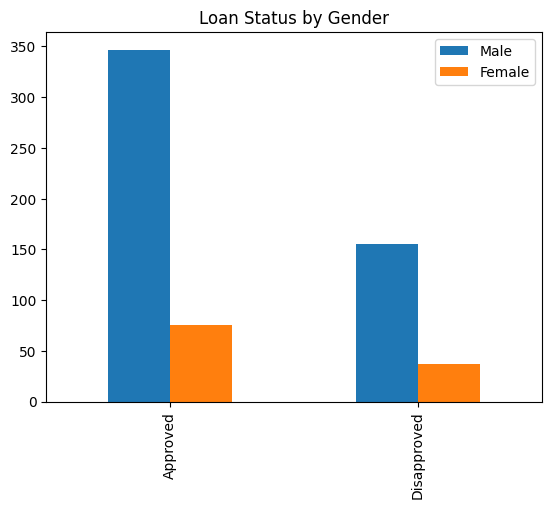

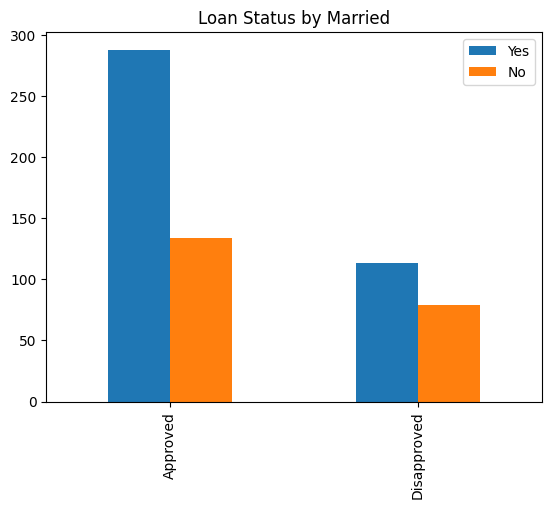

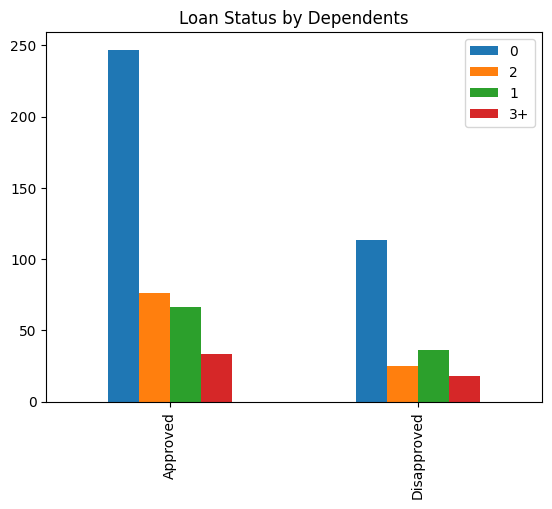

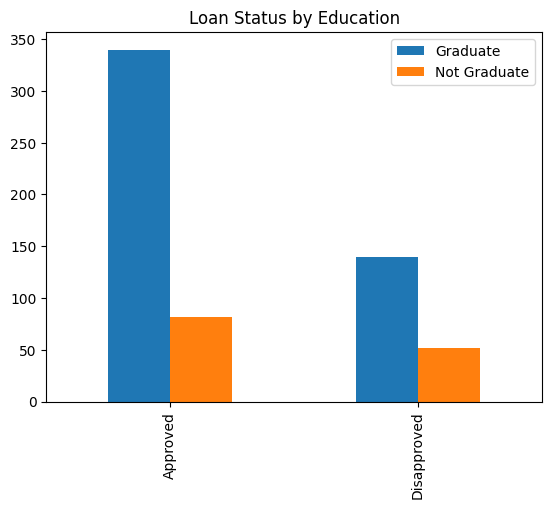

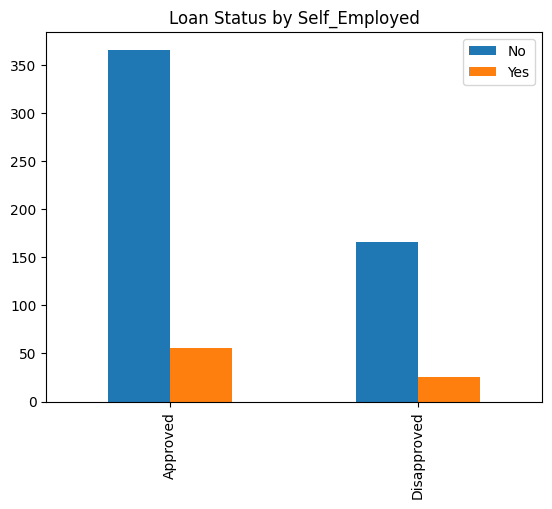

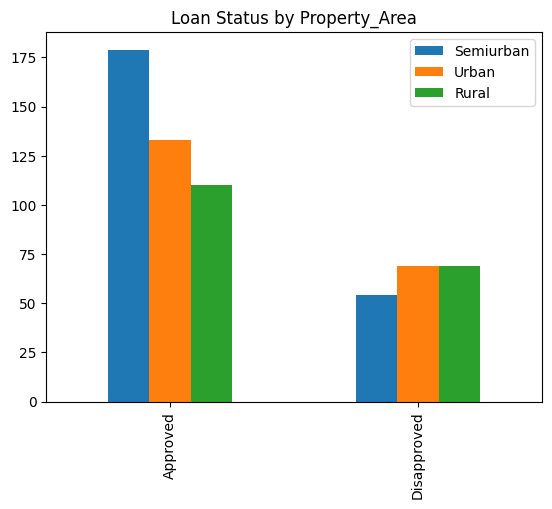

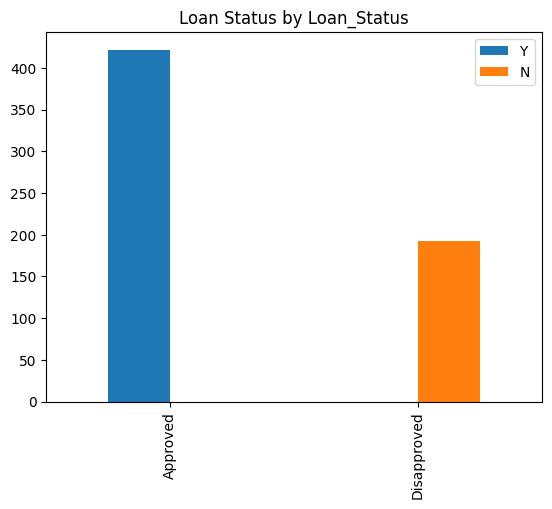

In [15]:
for col in categorical_cols:
    bar_chart(col)
    

## **Data Preprocessing** ##

In [16]:
from sklearn.preprocessing import OrdinalEncoder 

ord_enc = OrdinalEncoder() 
data[["Gender",'Married','Education','Self_Employed',"Dependents",'Property_Area','Loan_Status']] = ord_enc.fit_transform(data[["Gender",'Married','Education','Self_Employed',"Dependents",'Property_Area','Loan_Status']])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


In [17]:
data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [18]:
data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']] = data[["Gender",'Married','Education','Self_Employed','Property_Area','Loan_Status']].astype('int')

In [19]:
data.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,146.412162,360.0,1.0,2,1


In [21]:
from sklearn.model_selection import train_test_split  
X = data.drop("Loan_Status", axis=1) 
y = data["Loan_Status"] 

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2) 
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape) 
print(y_test.shape)

(491, 11)
(491,)
(123, 11)
(123,)


# **Modelling**

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_classification_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted, average='weighted')
    recall = recall_score(true, predicted, average='weighted')
    f1 = f1_score(true, predicted, average='weighted')

    return accuracy, precision, recall, f1

In [44]:
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

models = {
    "XGBoost Classifier": XGBClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "GaussianNB": GaussianNB()
}

model_list = []
accuracy_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    accuracy, precision, recall, f1 = evaluate_classification_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(accuracy))
    print("- Precision: {:.4f}".format(precision))
    print("- Recall: {:.4f}".format(recall))
    print("- F1 Score: {:.4f}".format(f1))
    accuracy_list.append(accuracy)

    print('='*35)
    print('\n')

XGBoost Classifier
Model performance for Test set
- Accuracy: 0.7236
- Precision: 0.7051
- Recall: 0.7236
- F1 Score: 0.6955


Decision Tree
Model performance for Test set
- Accuracy: 0.6748
- Precision: 0.6662
- Recall: 0.6748
- F1 Score: 0.6698


Random Forest
Model performance for Test set
- Accuracy: 0.7642
- Precision: 0.7669
- Recall: 0.7642
- F1 Score: 0.7339


K-Nearest Neighbors
Model performance for Test set
- Accuracy: 0.6260
- Precision: 0.5815
- Recall: 0.6260
- F1 Score: 0.5940


Support Vector Machine
Model performance for Test set
- Accuracy: 0.6829
- Precision: 0.4664
- Recall: 0.6829
- F1 Score: 0.5543




c:\Users\yashm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Gradient Boosting
Model performance for Test set
- Accuracy: 0.7480
- Precision: 0.7428
- Recall: 0.7480
- F1 Score: 0.7155


GaussianNB
Model performance for Test set
- Accuracy: 0.7805
- Precision: 0.7841
- Recall: 0.7805
- F1 Score: 0.7563




In [45]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"],ascending=False)
     

,Model Name,Accuracy
6,GaussianNB,0.780488
2,Random Forest,0.764228
5,Gradient Boosting,0.747967
0,XGBoost Classifier,0.723577
4,Support Vector Machine,0.682927
1,Decision Tree,0.674797
3,K-Nearest Neighbors,0.626016


**We observe that the GaussianNB has the highest accuracy of 78.04.**

We will try hyperparameter tuning for 1st and 2nd best models.


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()


param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.7902700474129045


# Basic modelling done just for the sake of demonstration.